In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit
import h5py
import pyvisa
import time
from scipy.signal import savgol_filter
import scipy.signal as signal
from scipy import interpolate
from scipy.signal import windows
from matplotlib.ticker import MaxNLocator
from scipy.optimize import least_squares

In [2]:
factor = 2
SMALL_SIZE = factor*8
MEDIUM_SIZE = factor*10
BIGGER_SIZE = factor*12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Plotting functions

In [68]:
def plot(rn_arr, fname="test.hdf", comment=""):
    with h5py.File(fname, 'r') as f:
        # get attributes
        dset = f[rn_arr[0]]
        pol, amp, offs = dset.attrs['polarity'], dset.attrs['amp'], dset.attrs['offs']

        # determine how many datasets are available
        i_max = 0
        for rn in rn_arr:
            try:
                f[rn]
                i_max += 1
            except KeyError:
                pass
        
        # combine the data from the available datasets
        data = np.concatenate([np.array(f[rn]) for rn in rn_arr[:i_max]])

    # remove invalid data points
    f = data[:,1]
    Vpp = data[:,2]*10
    mask = f > 1e20
    f[mask] = np.nan
    Vpp[mask] = np.nan
    
    # plot the data
    fig, ax = plt.subplots(nrows=1)
    ax.semilogx(f, Vpp, 'o-')
    
    # plot format
    ax.set_xlabel("freq [Hz]")
    ax.set_ylabel("Vpp [kV]")
    ax.set_title(f"{pol}, amp={amp}, offs={offs}")
    ax.grid(which="both")

### Testing

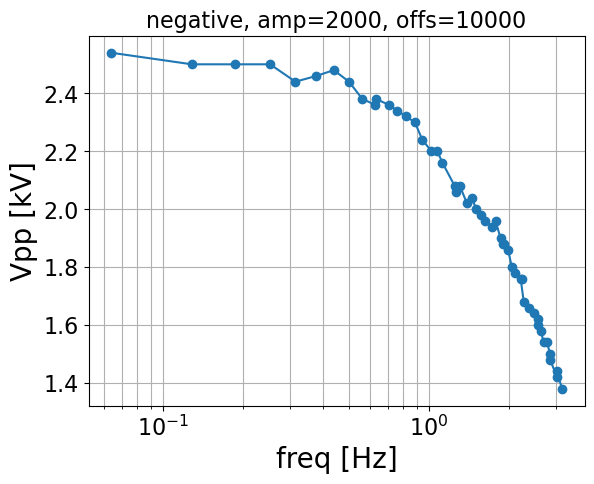

In [54]:
plot(
    rn_arr  = [f"A-{i}" for i in range(5)],
    fname   = "HV_AC_test.hdf",
    comment = "",
)

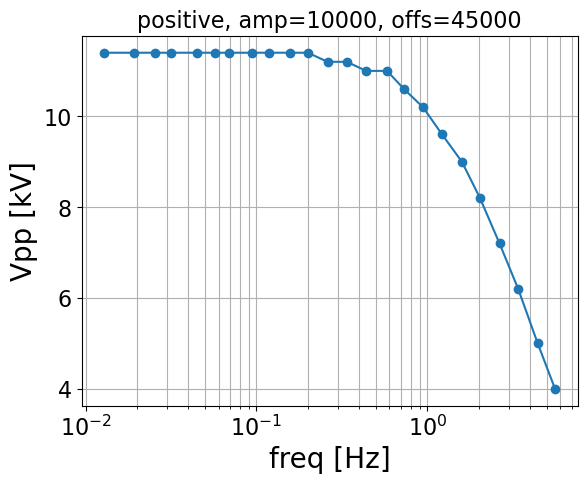

In [63]:
plot(
    rn_arr  = [f"B-{i}" for i in range(1)],
    fname   = "HV_AC_test.hdf",
    comment = "",
)